In [1]:
from utils.augment import get_training_augmentation
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [2]:
def visualize_ir(img, colorbar='False', save_path=None):
    plt.imshow(img, cmap='cividis')

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        cv2.imwrite(save_path, img)

In [113]:
images = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_im.npy')
masks = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_ma.npy')


In [4]:
def preprocess(images, masks):
    ######## Reshape Input ############
    print(images[0].dtype)
    print("Original im shape ...", images.shape)
    
    # sm.unet expects 3 channel input
    images = np.stack((images,)*3, axis=-1)

    print("New im shape ...", images.shape)
    print("Original masks shape ...", masks.shape)

    masks = np.expand_dims(masks, -1)
    masks = to_categorical(masks, num_classes=3)

    print("New masks shape ...", masks.shape)
    print("Pixel values in the mask are: ", np.unique(masks))

    return images, masks


In [114]:
ims, mas = images, masks

In [12]:
print(ims.shape[0])

32


In [34]:
print(ims[0].shape)

(256, 256)


In [16]:
from utils.augment import get_training_augmentation

In [11]:
trans = get_training_augmentation()
print(type(trans))
print(ims[0]))

<class 'albumentations.core.composition.Compose'>
<class 'numpy.ndarray'>


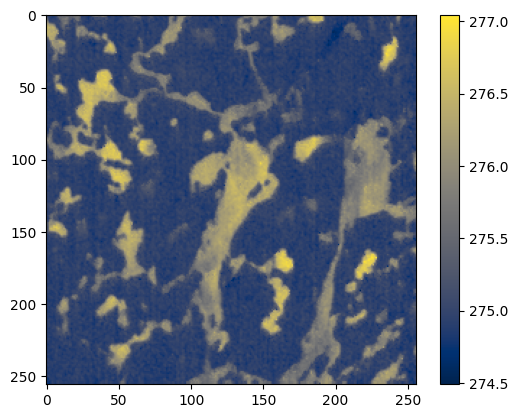

In [35]:
visualize_ir(ims[3])

In [17]:
import albumentations as A

In [183]:
train_transform = A.Compose([

        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        # crop border so original shapes
        A.Rotate(p=0.5, interpolation=0)
        
        # A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=4),
        #A.PadIfNeeded(min_height=256, min_width=256, always_apply=True, border_mode=0)
])

In [184]:
im_augmented=[]
ma_augmented=[]

for i in range(0,ims.shape[0]):
    print(ims[i].shape)
    sample = train_transform(image=ims[i],mask=mas[i])
    im_aug, ma_aug = sample['image'], sample['mask']
    print(im_aug.shape)
    im_augmented.append(im_aug)
    ma_augmented.append(ma_aug)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [175]:
#ims = ims.tolist()
#mas = mas.tolist()
print(len(ims))
print(len(im_augmented))

new_ims = [j for i in [ims, im_augmented] for j in i]
new_mas = [j for i in [mas, ma_augmented] for j in i]

new_ims = np.array(new_ims)
new_mas = np.array(new_mas)


32
32


C:\Users\marle\AppData\Local\Temp\ipykernel_8488\3045076064.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_ims = np.array(new_ims)
C:\Users\marle\AppData\Local\Temp\ipykernel_8488\3045076064.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_mas = np.array(new_mas)


In [176]:
# Generate shuffled indices
indices = np.random.permutation(len(new_ims))

# Shuffle both arrays using the indices
new_ims = new_ims[indices]
new_mas = new_mas[indices]

In [185]:
print(len(im_augmented))
im_augmented=np.array(im_augmented)
ma_augmented=np.array(ma_augmented)

32


In [155]:
print(im_augmented[0].shape)

(256, 256)


In [151]:
new_mas = np.array(new_mas)
print(new_mas[0].shape)

print(np.unique(new_mas[40]))

(256, 256)
[0 1 2]


In [181]:
np.save('E:/polar/code/data/ir/entire/original_size/prepared/256_im_aug.npy', im_augmented)
np.save('E:/polar/code/data/ir/entire/original_size/prepared/256_ma_aug.npy', ma_augmented)

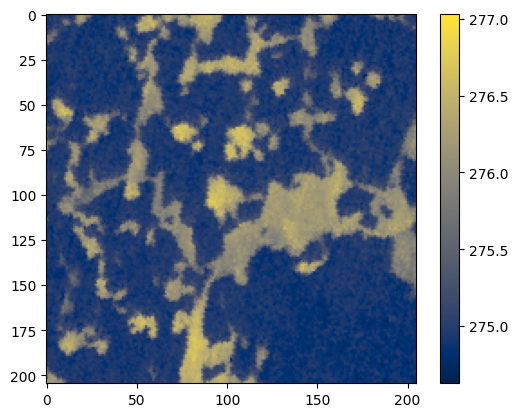

In [177]:
visualize_ir(new_ims[63])

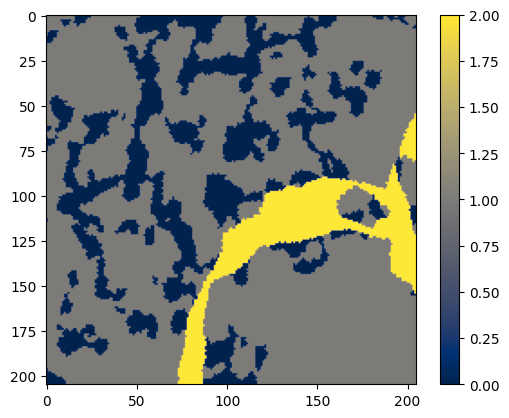

In [178]:
visualize_ir(new_mas[63])

In [5]:
import numpy as np
from imagepre import train_new
import cv2
import os
from utils.augmentation import get_training_augmentation, get_preprocessing, offline_augmentation
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_im.npy')
y = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_ma.npy')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print("Train size imgs ...", X_train.shape)
print("Train size masks ...", y_train.shape)
print("Test size imgs ...", X_test.shape)
print("Test size masks ...", y_test.shape)

X_train_new, y_train_new = offline_augmentation(X_train, y_train, im_size=256, mode=0)

print("Train size imgs ...", X_train_new.shape)
print("Train size masks ...", y_train_new.shape)


Train size imgs ... (25, 256, 256)
Train size masks ... (25, 256, 256)
Test size imgs ... (7, 256, 256)
Test size masks ... (7, 256, 256)
0


TypeError: get_training_augmentation() got an unexpected keyword argument 'image'